# Вебинар 1. Введение, примеры задач, бизнес- и ML-метрики 

![title](logo.png)

## В чем отличие от классификации?

In [12]:
import pandas as pd
import numpy as np

In [13]:
pd.DataFrame([['Иван', 'Хлеб Бородинский', 1],
             ['Иван', 'Хлеб Белый', 0],
             ['Василий', 'Йогурт Epica', 1]], columns=['user', 'item', 'purchase_fact'])

,user,item,purchase_fact
0,Иван,Хлеб Бородинский,1
1,Иван,Хлеб Белый,0
2,Василий,Йогурт Epica,1


Постойте, ведь можно добавить фичи на user (средний чек, кол-во покупок в категориях и т.д), 
на item (цена, кол-во продаж в неделю и т.l), и решать задачу классификации. В чем отличие RecSys от классификации?

 - Много предсказаний для 1 user (extreme classification)
 - Гораздо больший объем данных: 100K users, 10K items --> 1B предсказаний
 - Большинство товаров user никогда не видел --> Не взаимодействовал --> 0 не значит "не понравился"
 - Нет явного таргета. Не понятно, что значит "(не) понравился"
 - Feedback loop
 - Иногда важен порядок рекомендаций

In [14]:
pd.DataFrame([['Иван', 'Хлеб Бородинский', 1],
              ['Иван', 'Хлеб Белый', 0],
              ['Иван', 'Йогурт Epica', "?"],
              ['Василий', 'Хлеб Бородинский', "?"],
              ['Василий', 'Хлеб Белый', "?"],
              ['Василий', 'Йогурт Epica', 1]], columns=['user', 'item', 'purchase_fact'])

,user,item,purchase_fact
0,Иван,Хлеб Бородинский,1
1,Иван,Хлеб Белый,0
2,Иван,Йогурт Epica,?
3,Василий,Хлеб Бородинский,?
4,Василий,Хлеб Белый,?
5,Василий,Йогурт Epica,1


----

## Основные типы задач:
    
**Рекомендация топ-К товаров**: Дан список товаров. Рекомендовать пользователю K товаров, которые ему понравятся
    - e-mail рассылки (М.Видео, Hoff, Пятерочка)
    - push-уведомления (Delivery Club, HeadHunter, Виктория)
    - Рекомендации в отдельном окне на сайте (vk, okko)

**Ранжирование товаров**: Дан список товаров. Нужно его отранжировать в порядке убывания интереса для пользователя
    - Ранжирование каталога товаров (Wildberries, Lamoda)
    - Ранжирование ленты (vk, Я.Дзен)
    - Ранжирование поисковой выдачи (Яндекс, Гугл)
    - Ранжирование "каруселей" товаров (Delivery Club, Я.Еда)
    
**Поиск похожих товаров**: Дан 1 товар. Нужно найти наиболее похожие на него товары
    - "Вам также может понравиться" (Ozon, Циан)
    - Похожим пользователям понравилось (vk)
    - Вы можете быть знакомы (vk, facebook)
    
**Рекомендация дополнителдьного товара**. Дан 1 товар. Найти товары, которые покупают вместе с этим товаром
    - С этим товаром часто покупают (Я.Маркет, Ozon, М.Видео)
    
   
---
На 7 вебинаре мы разберем рекомендательные системы из интересующих вас сервисов :)

---

# 2. ML-mетрики качества

*Хороши ли рекомендации, предлагаемые моделью?*  
Обычно считаются для каждого юзера, затем усредняются по юзерам

Представим, что в магазине всего 10 товаров

In [103]:
recommended_list = [143, 156, 1134, 991, 27, 1543, 3345, 533, 11, 43] #id товаров, в порядке релевантности
bought_list = [521, 32, 143, 991]
prices_recommended = [400, 60, 40, 40 , 90] 

### 1. Hit rate

Hit rate = был ли хотя бы 1 релевантный товар среди рекомендованных

- Иногда применяется, когда продаются достаточно дорогие товары (например, бытовая техника) 

----
Hit rate = (был ли хотя бы 1 релевантный товар среди рекомендованных)   

Hit rate@k = (был ли хотя бы 1 релевантный товар среди топ-k рекомендованных)

In [29]:
def hit_rate(recommended_list, bought_list):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    flags = np.isin(bought_list, recommended_list)
    
    hit_rate = (flags.sum() > 0) * 1
    
    return hit_rate


def hit_rate_at_k(recommended_list, bought_list, k=5):
     
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    #recommended_list = np.arrat(recommended list[:5])
    
    flags = np.isin(bought_list, recommended_list[:5])
    #flags = np.isin(bought_list, recommended_list)
    
    hit_rate = (flags.sum() > 0) *1
    
    return hit_rate

In [30]:
hit_rate(recommended_list, bought_list)

1

In [31]:
hit_rate_at_k(recommended_list, bought_list)

1

### 2. Precision

*Precision* - доля релевантных товаров среди рекомендованных = Какой % рекомендованных товаров  юзер купил

- Пожалуй, самая приближенная к бизнес-метрикам и самая популярная метрика

---

Precision= (# of recommended items that are relevant) / (# of recommended items)  

Precision@k = (# of recommended items @k that are relevant) / (# of recommended items @k)

Money Precision@k = (revenue of recommended items @k that are relevant) / (revenue of recommended items @k)  

**Note:** Обычно k в precision@k достаточно невелико (5-20) и определяется из бизнес-логики. Например, 5 товаров в e-mail рассылке, 20 ответов на первой странице google и т.д

Красная рыба - 400 руб  
Молоко - 60 руб  
Хлеб = 40 руб  
Гречка = 40 руб  
Шоколад = 90 руб  

------  
Варенье - 240 руб  
...  

**Case 1**  
prices_resommended = [400, 60, 40, 40 , 90]  
flags = [1, 0, 0, 0 , 1]  

$precison@5 = \frac{1 + 0 + 0 +0 + 1}{1+1+1+1+1} = 40\%$  
$money precision@5 = \frac{1*400 + 0*60 + ... + 1*90}{1*400 + 1*60 + ... + 1*90} = 77.7\%$  

  
**Case 2**   
prices_resommended = [400, 60, 40, 40 , 90]  
flags = [0, 1, 0, 0 , 1]  

$precison@5 = \frac{0 + 1 + 0 +0 + 1}{1+1+1+1+1} = 40\%$  
$money precision@5 = \frac{0*400 + 1*60 + ... + 1*90}{1*400 + 1*60 + ... + 1*90} = 15.8\%$

In [109]:
def precision(recommended_list, bought_list):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    flags = np.isin(bought_list, recommended_list)
    
    precision = flags.sum() / len(recommended_list)
    
    return precision


def precision_at_k(recommended_list, bought_list, k=5):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    bought_list = bought_list  # Тут нет [:k] !!
    recommended_list = recommended_list[:k]
    
    flags = np.isin(bought_list, recommended_list)
    
    precision = flags.sum() / len(recommended_list)
    
    
    return precision


def money_precision_at_k(recommended_list, bought_list, prices_recommended, k=5):
        
        bought_list = np.array(bought_list)
        recommended_list = np.array(recommended_list[:k])
        
        flags = np.isin(bought_list, recommended_list)
        
        money_precision_at_k = sum(flags * prices_recommended[:len(flags)]) / sum(prices_recommended[:k])

        return money_precision_at_k

In [113]:
money_precision_at_k(recommended_list, bought_list, prices_recommended, k=5)

0.12698412698412698

### 3. Recall

*Recall* - доля рекомендованных товаров среди релевантных = Какой % купленных товаров был среди рекомендованных

- Обычно используется для моделей пре-фильтрации товаров (убрать те товары, которые точно не будем рекомендовать)

---

Recall= (# of recommended items that are relevant) / (# of relevant items)  

Recall@k = (# of recommended items @k that are relevant) / (# of relevant items)

Money Recall@k = (revenue of recommended items @k that are relevant) / (revenue of relevant items)  

    
  
**Note:** в recall@k число k обычно достаточно большое (50-200), больше чем покупок у среднестатистического юзера

In [161]:
recommended_list =   [143, 156, 1134, 991, 27, 1543, 3345, 533, 11, 43] #id товаров, в порядке релевантности
prices_recommended = [100, 90, 10, 450, 50, 37, 99, 120, 34, 100]

bought_list = [521, 32, 143, 991]

prices_bought = [110, 190, 100, 450]

In [173]:
def recall(recommended_list, bought_list):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    flags = np.isin(bought_list, recommended_list)
    
    recall = flags.sum() / len(bought_list)
    
    return recall


def recall_at_k(recommended_list, bought_list, k=5):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list[:k])
    
    flags = np.isin(bought_list, recommended_list)
    
    recall = flags.sum() / len(bought_list)
    
    return recall


def money_recall_at_k(recommended_list, bought_list, prices_recommended, prices_bought, k=5):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list[:k])
    
    flags = np.isin(recommended_list, bought_list)
    flags = np.array(flags[:k])
    sum_rel_items_bought = sum(flags*prices_recommended[:len(flags)])
    
    recall = sum_rel_items_bought / sum(prices_bought)
    
    
    return round(recall, 2)

In [121]:
recall(recommended_list, bought_list)

0.5

In [120]:
recall_at_k(recommended_list, bought_list, k=5)

0.5

In [172]:
money_recall_at_k(recommended_list, bought_list, prices_recommended, prices_bought, k=5)

0.6470588235294118

---

# Метрики ранжирования

Если важен порядок рекомендаций. Подробнее можно почитать [здесь](https://habr.com/ru/company/econtenta/blog/303458/). Формулы в статье могут несколько отличаться от формул в лекции 

## AP@K
AP@K - average precision at k

$$AP@K = \frac{1}{K} \sum_{k=1}^{K}{[recommended_{relevant_k}] * precision@k}$$

- Суммируем по всем релевантным товарам
- Зависит от порядка реокмендаций

In [ ]:
1/3 * (0+0+1/3)
1/3 * (1+0+0)

In [202]:
def ap_k(recommended_list, bought_list, k=5):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    flags = np.isin(recommended_list, bought_list)
    
    if sum(flags) == 0:
        return 0
    
    sum_ = 0
    for i in range(1, k+1):
        
        if flags[i] == True:
            p_k = precision_at_k(recommended_list, bought_list, k=i)
            sum_ += p_k
            
    result = sum_ / k
    
    return result

### MAP@k

MAP@k (Mean Average Precision@k)  
Среднее AP@k по всем юзерам
- Показывает средневзвешенную точность рекомендаций

$$MAP@k = \frac{1}{|U|} \sum_u{AP_k}$$
  
|U| - кол-во юзеров

In [203]:
import ml_metrics as metrics

def map_k(bought_list, recommended_list,k=5):
    
    """
    Computes the mean average precision at k.
    This function computes the mean average prescision at k between two lists
    of lists of items.
    Parameters
    ----------
    actual : list
             A list of lists of elements that are to be predicted 
             (order doesn't matter in the lists)
    predicted : list
                A list of lists of predicted elements
                (order matters in the lists)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The mean average precision at k over the input lists
    """
    apk = 0
    apk_list = []  
    
    for items in bought_list:
        apk = ap_k(recommended_list, bought_list, k)
        apk_list.append(apk)
    
    map_k = sum(apk_list) / len(apk_list)
    
    return map_k

In [204]:
map_k(bought_list, recommended_list, k=5)

0.06666666666666667

### AUC@k
AUC для первых k наблюдений  
- Можно посчитать как sklern.metrics.roc_auc_score для топ-k предсказаний
- Показывает долю верно отранжированных товаров

### NDCG@k
Normalized discounted cumulative gain

$$DCG = \frac{1}{|r|} \sum_u{\frac{[bought fact]}{discount(i)}}$$  

$discount(i) = 1$ if $i <= 2$,   
$discount(i) = log_2(i)$ if $i > 2$


(!) Считаем для первых k рекоммендаций   
(!) - существуют вариации с другими $discount(i)$  
i - ранк рекомендованного товара  
|r| - кол-во рекомендованных товаров 

$$NDCG = \frac{DCG}{ideal DCG}$$


In [205]:
recommended_list = [143, 156, 1134, 991, 27, 1543, 3345, 533, 11, 43] #id товаров
bought_list = [521, 32, 143, 991]

$DCG@5 = \frac{1}{5}*(1 / 1 + 0 / 2 + 0 / log(3) + 1 / log(4) + 0 / log(5))$  
$ideal DCG@5 = \frac{1}{5}*(1 / 1 + 1 / 2 + 1 / log(3) + 1 / log(4) + 1 / log(5))$  

$NDCG = \frac{DCG}{ideal DCG}$

### MRR@k
Mean Reciprocal Rank

- Считаем для первых k рекоммендаций
- Найти ранк первого релевантного предсказания $k_u$
- Посчитать reciprocal rank = $\frac{1}{k_u}$

$$MRR = mean(\frac{1}{k_u})$$

In [294]:
def reciprocal_rank(recommended_list, bought_list, k):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    inter = list(set(recommended_list[:k]) & set(bought_list))
    #inter = list(set(recommended_list[:len(bought_list)]) & set(bought_list))
    
    index_sum = []
    for i in inter:
        index_sum.append(1/(list(bought_list).index(i)+1))
    index = sum(index_sum) / len(index_sum)
    
    return round(index,2)

In [295]:
reciprocal_rank(recommended_list, bought_list, k=5)

0.29

# 3. Связь бизнес-метрик, ML-метрик и функции потерь(loss)

- **loss** - то, что оптимизирует модель (RMSE - Root Mean Squared Error)
- **ML-метрика** - то, как мы измеряем качество на test (money precision@5)
- **Бизнес-метрика** - то, что хочет оптимизировать бизнес (выручка)

В идеале loss = ML-метрика = бизнес-метрика, но это возмонжо в очень редких случаях

Надеемся, что:  
    *Оптимизация loss --> рост ML-метрик --> рост бизнес-метрик*

### Пример: рекомендательная система товаров на сайте  
      
На сайте есть баннер, на котором мы можем разместить 5 товаров. Надо порекомендовать эти 5 товаров персонально каждому юзеру

*Шаг 1: Определим бизнес-метрику*  
Бизнес хочет максимизировать выручку --> бизнес-метрика - **Выручка**  

*Шаг 2: Разложим ее на составляющие*  
Выручка =   
       Средний чек * кол-во покупок =   
       Средний чек * (число юзеров * конверсия из захода на сайт в заказ) =
       Число юзеров * (Средний чек * конверсия из захода на сайт в заказ)
       
Рекомендательная система влияет только на (Средний чек * конверсия из захода на сайт в заказ).   
Хорошим приближением этого является **money precision@5** - ML-метрика

*Шаг 3: loss*  
Это существенно сложнее. Персонализированные ML-модели не умеют напрямую оптимизировать конверсию. Стандартный loss - **RMSE**. Можно для начала попробовать его. 

P.S. Если вы хотите приблизить RMSE к money precision@5, то можно посчитать weighted RMSE, где вес каждого наблюдения = стоимость товара.   
P.S.S. Про другие виды loss будет рассказано в курсе

## Домашнее задание

**1. Приведите другие примеры метрик для оценки качества ранжирования и рекомендательных систем (свои знания, статьи из интернета, whatever)**

**2. Доделайте метрики из этого ноутбука (смотрите пометки #your_code)**

https://serpstat.com/ru/blog/chto-mi-znaem-o-metrikah-otcenki-kachestva-poiska/#3
Разработка Яндекс, которая используется для оценки качества ранжирования. Расчет PFound производится по такой формуле:

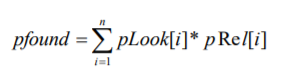

Где pLook[i] — вероятность просмотреть i-й документ из списка, а pRel[i] — вероятность того, что i-й документ окажется релевантным.

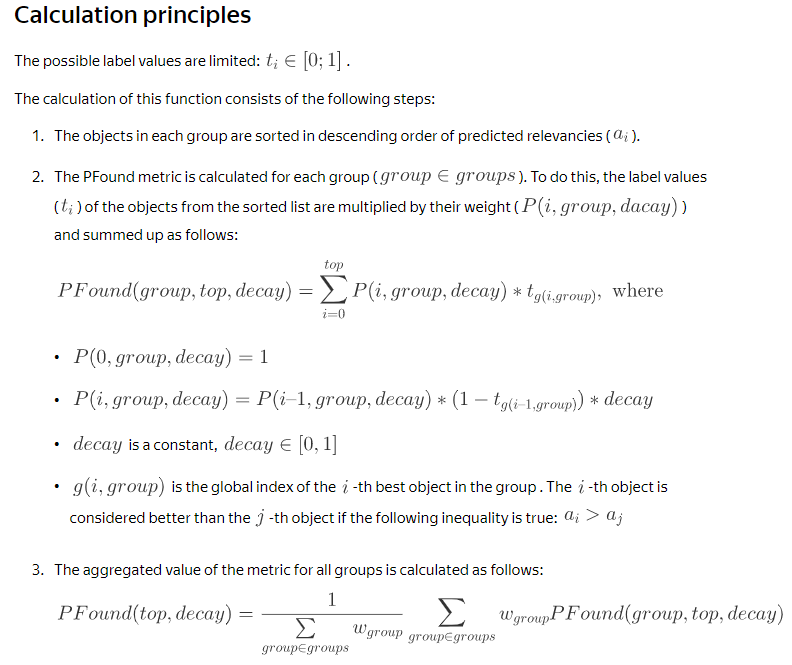